In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest§
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

### EDA

In [4]:
df = pd.read_csv('/Users/pratiksuchak/Documents/Colorectal Cancer Detection Project/artifacts/raw/colorectal_cancer_dataset.csv')
df.head()


,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [5]:
df.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [6]:
df["Country"].value_counts()

Country
USA             25927
China           17525
South Korea     14107
Japan           13924
UK              12276
Germany         12258
India           10479
France          10426
Brazil          10399
Canada           8819
Italy            8795
Australia        6877
South Africa     5172
Nigeria          3551
Pakistan         3549
New Zealand      3413
Name: count, dtype: int64

In [7]:
df["Gender"].value_counts()

Gender
M    100686
F     66811
Name: count, dtype: int64

In [8]:
df["Cancer_Stage"].value_counts()

Cancer_Stage
Regional      66981
Localized     66799
Metastatic    33717
Name: count, dtype: int64

In [9]:
df["Family_History"].value_counts()

Family_History
No     117184
Yes     50313
Name: count, dtype: int64

In [10]:
df["Smoking_History"].value_counts()

Smoking_History
No     100141
Yes     67356
Name: count, dtype: int64

In [11]:
df["Alcohol_Consumption"].value_counts()

Alcohol_Consumption
Yes    83857
No     83640
Name: count, dtype: int64

In [12]:
df["Obesity_BMI"].value_counts()

Obesity_BMI
Overweight    67168
Normal        50190
Obese         50139
Name: count, dtype: int64

In [13]:
df["Diet_Risk"].value_counts()

Diet_Risk
Moderate    83871
High        50295
Low         33331
Name: count, dtype: int64

In [14]:
df["Physical_Activity"].value_counts()

Physical_Activity
Moderate    67022
Low         50471
High        50004
Name: count, dtype: int64

In [15]:
df["Diabetes"].value_counts()

Diabetes
No     133941
Yes     33556
Name: count, dtype: int64

In [16]:
df["Inflammatory_Bowel_Disease"].value_counts()

Inflammatory_Bowel_Disease
No     150711
Yes     16786
Name: count, dtype: int64

In [17]:
df["Genetic_Mutation"].value_counts()

Genetic_Mutation
No     142584
Yes     24913
Name: count, dtype: int64

In [18]:
df["Screening_History"].value_counts()

Screening_History
Regular      67149
Irregular    66816
Never        33532
Name: count, dtype: int64

In [19]:
df["Early_Detection"].value_counts()

Early_Detection
Yes    100260
No      67237
Name: count, dtype: int64

In [20]:
df["Treatment_Type"].value_counts()

Treatment_Type
Surgery         66934
Chemotherapy    50443
Combination     33276
Radiotherapy    16844
Name: count, dtype: int64

In [21]:
df["Healthcare_Access"].value_counts() 

Healthcare_Access
Moderate    83539
High        50268
Low         33690
Name: count, dtype: int64

In [22]:
df["Survival_Prediction"].value_counts()

Survival_Prediction
Yes    100437
No      67060
Name: count, dtype: int64

In [23]:
df.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.shape

(167497, 28)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [27]:
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


### Visualizations

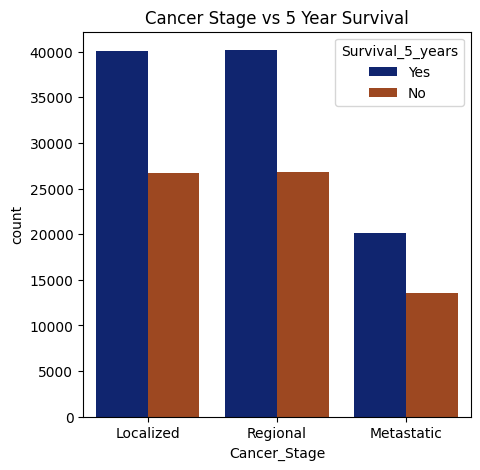

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='Cancer_Stage', hue="Survival_5_years", data=df, palette = "dark")
plt.title('Cancer Stage vs 5 Year Survival')
plt.show()

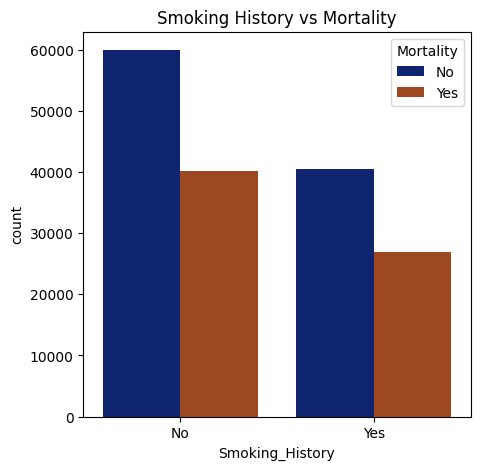

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x='Smoking_History', hue="Mortality", data=df, palette = "dark")
plt.title('Smoking History vs Mortality')
plt.show()

/var/folders/t8/1dg104bs525bz9xt8xgyrt_w0000gn/T/ipykernel_33311/4011759887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancer_Stage', y="Tumor_Size_mm", data=df, palette = "dark")


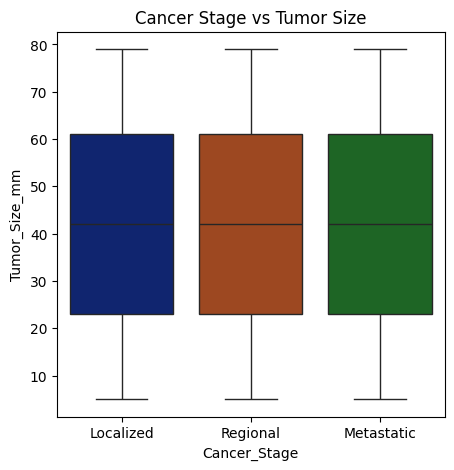

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Cancer_Stage', y="Tumor_Size_mm", data=df, palette = "dark")
plt.title('Cancer Stage vs Tumor Size')
plt.show()

### SEEMS LIKE A SYNTHETIC DATA. BUT WELL RESEARCHED

### DATA PREPROCESSING


In [31]:
df = df.drop(columns='Patient_ID')

In [32]:
X = df.drop(columns=['Survival_Prediction'])
Y = df["Survival_Prediction"]

### Encoding on object data types

In [33]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [34]:
len(categorical_cols), len(numerical_cols)

(21, 5)

In [35]:
numerical_cols

Index(['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 'Incidence_Rate_per_100K',
       'Mortality_Rate_per_100K'],
      dtype='object')

In [36]:
categorical_cols

Index(['Country', 'Gender', 'Cancer_Stage', 'Family_History',
       'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk',
       'Physical_Activity', 'Diabetes', 'Inflammatory_Bowel_Disease',
       'Genetic_Mutation', 'Screening_History', 'Early_Detection',
       'Treatment_Type', 'Survival_5_years', 'Mortality', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status'],
      dtype='object')

In [37]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [38]:
X.head()

,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Treatment_Type,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status
0,14,77,1,0,69,0,0,1,2,1,...,1,1,0,54413,50,5,1,0,2,0
1,14,59,1,0,33,0,0,0,2,2,...,0,1,0,76553,37,25,1,1,0,1
2,8,66,1,2,17,0,1,0,0,1,...,0,1,0,62805,54,27,1,0,2,1
3,15,83,1,2,14,0,0,0,1,0,...,3,1,0,89393,45,11,1,0,2,0
4,4,66,1,0,34,0,1,0,0,1,...,3,1,0,66425,15,27,1,1,0,0


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Country                     167497 non-null  int64
 1   Age                         167497 non-null  int64
 2   Gender                      167497 non-null  int64
 3   Cancer_Stage                167497 non-null  int64
 4   Tumor_Size_mm               167497 non-null  int64
 5   Family_History              167497 non-null  int64
 6   Smoking_History             167497 non-null  int64
 7   Alcohol_Consumption         167497 non-null  int64
 8   Obesity_BMI                 167497 non-null  int64
 9   Diet_Risk                   167497 non-null  int64
 10  Physical_Activity           167497 non-null  int64
 11  Diabetes                    167497 non-null  int64
 12  Inflammatory_Bowel_Disease  167497 non-null  int64
 13  Genetic_Mutation            167497 non-null 

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Feature Selection

In [42]:
### CHI-SQUARE TEST

X_cat = X_train.select_dtypes(include=['int64', 'float64'])
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_cat,Y_train)

,"score_func score_func: callable, default=f_classifFunction taking two arrays X and y, and returning a pair of arrays(scores, pvalues) or a single array with scores.Default is f_classif (see below ""See Also""). The default function onlyworks with classification tasks... versionadded:: 0.18",<function chi2 at 0x119736160>
,"k k: int or ""all"", default=10Number of top features to select.The ""all"" option bypasses selection, for use in a parameter search.",'all'


In [43]:
chi2_scores = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2_Score': chi2_selector.scores_
}).sort_values(by='Chi2_Score', ascending=False)

In [44]:
chi2_scores

,Feature,Chi2_Score
19,Healthcare_Costs,2097.430133
4,Tumor_Size_mm,7.971461
16,Treatment_Type,4.987144
11,Diabetes,2.103967
21,Mortality_Rate_per_100K,1.963077
25,Insurance_Status,1.464241
3,Cancer_Stage,1.281849
14,Screening_History,1.159519
0,Country,0.883425
24,Healthcare_Access,0.713346


In [47]:
top_features = chi2_scores.head(5)["Feature"].tolist()
top_features

['Healthcare_Costs',
 'Tumor_Size_mm',
 'Treatment_Type',
 'Diabetes',
 'Mortality_Rate_per_100K']

In [48]:
X = X[top_features]
X.shape

(167497, 5)

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

In [51]:
X_train.shape

(133997, 5)

#### Model Building

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 3, random_state=42)

In [56]:
gb.fit(X_train, Y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [57]:
Y_pred = gb.predict(X_test)

In [59]:
accuracy = accuracy_score(Y_test, Y_pred)

In [60]:
accuracy

0.5995223880597015

In [62]:
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

          No       0.44      0.00      0.00     13412
         Yes       0.60      1.00      0.75     20088

    accuracy                           0.60     33500
   macro avg       0.52      0.50      0.38     33500
weighted avg       0.54      0.60      0.45     33500



In [63]:
y_proba = gb.predict_proba(X_test)[:, 1] if len(Y.unique())==2 else None

In [66]:
roc_auc_score(Y_test, y_proba)

0.49967731082550826

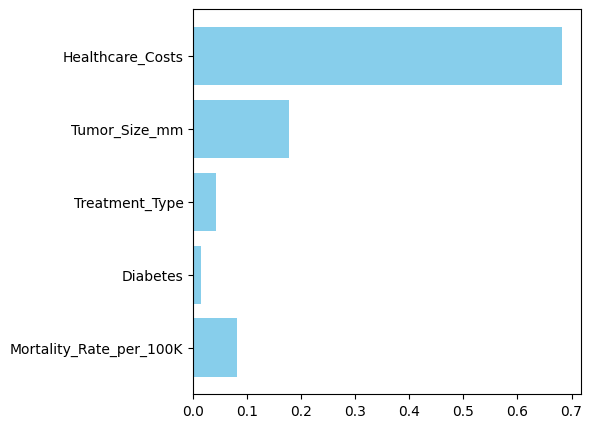

In [68]:
plt.figure(figsize=(5,5))
plt.barh(top_features, gb.feature_importances_, color = 'skyblue')
plt.gca().invert_yaxis()
plt.show()

#### Testing

In [71]:
X.columns

Index(['Healthcare_Costs', 'Tumor_Size_mm', 'Treatment_Type', 'Diabetes',
       'Mortality_Rate_per_100K'],
      dtype='object')

In [84]:
test_array = np.array([[1000,50,1,1,0]]) 

In [85]:
gb.predict(test_array)

array(['No'], dtype=object)